In [23]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from costs import * 
from least_squares import * 
from ridge import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [34]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
tX_tra = tX.T
#conc = np.column_stack((y, tX))
#conc_filtered = conc[~(conc == -999).any(1)]
#y = conc_filtered[:,0]
#tX = conc_filtered[:,1:]

## Do your thing crazy machine learning thing here :) ...

# Raw Data Analysis 

### Visualisation of the data

In [28]:
#print(tX[:,0])
#for x in tX_tra:
#    plt.plot(x)
#    plt.show()

(-2000, 6000)

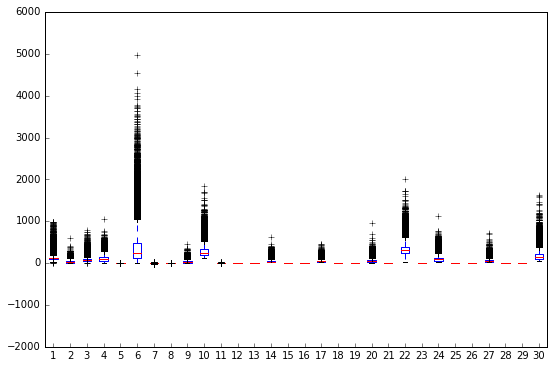

In [29]:
#Boxplot of the Raw Data
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(tX)

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

axes = plt.gca()
axes.set_ylim([-2000,6000])

#fig.savefig('foo.png')

## Data scaling 

In [30]:
minma_tX_tra = (tX_tra - tX_tra.min()) / (tX_tra.max() - tX_tra.min())
minima_tX = minma_tX_tra.T
#print(np.shape(minima_tX))
#print(np.shape(tX))


##### Boxplot of the scale data

(-0.5, 1.5)

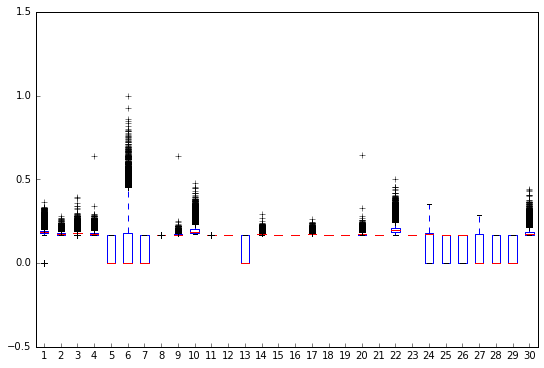

In [31]:
#Boxplot of the Normalized Data
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(minima_tX)

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

axes = plt.gca()
axes.set_ylim([-0.5,1.5])

## Data standardization

In [32]:
#np.mean(tX, axis=0)
centered_tX_tra = tX_tra - np.mean(tX_tra, axis=0)
std_tX_tra = centered_tX_tra / np.std(centered_tX_tra, axis=0)

std_tX = std_tX_tra.T

print(std_tX, "\n\n", np.mean(std_tX, axis=0), "\n\n", np.std(std_tX, axis=0))

[[ 1.4867924   0.13888078  0.85575891 ..., -0.64387525 -0.70155528
   1.09905529]
 [ 0.8252709   0.61641352  0.69451665 ..., -1.80317679 -1.80317679
   0.56533276]
 [-1.64323461  0.83799506  0.76060113 ..., -1.64323461 -1.64323461
   0.58601767]
 ..., 
 [ 0.70877105  0.60654838  0.64138704 ..., -1.80398273 -1.80398273
   0.56438162]
 [ 0.85592142  0.69921409  0.80173135 ..., -1.41200296 -1.41200296
   0.65907376]
 [-1.31240075  0.85683376  0.85293756 ..., -1.31240075 -1.31240075
   0.70957559]] 

 [ 0.39067852  0.44355703  0.6070142   0.59277833 -1.26117225 -0.46909969
 -1.26759346  0.25670126  0.346811    1.16634137  0.25311852  0.24749672
 -1.26621046  0.42849199  0.2464531   0.24646195  0.46476609  0.246438
  0.24668636  0.45116739  0.2464719   1.40140474  0.25409255 -0.2522227
 -0.57073461 -0.57076069 -1.11021943 -1.26748861 -1.26745577  0.76602663] 

 [ 1.08178055  0.4476243   0.33680788  0.28655948  0.50296042  1.92002852
  0.4932371   0.51695591  0.43771202  0.67286512  0.518930

##### Boxplot of the Standardized data

(-7, 7)

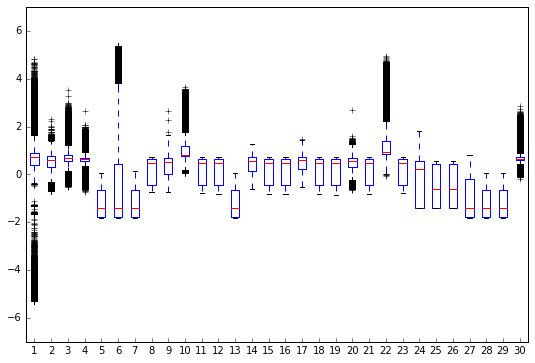

In [33]:
#Boxplot of the Normalized Data
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(std_tX)

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

axes = plt.gca()
axes.set_ylim([-7,7])

## Scatter plots

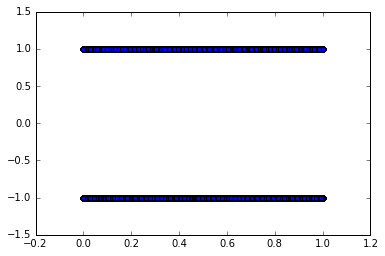

In [34]:
res = np.column_stack((y, tX[:,12])) # Change with tX[:,i] to plot y against the ith col of tX
res_filt = res[res[:,1] != -999]
plt.scatter(res_filt[:,1], res_filt[:,0])
plt.show()

## Correlations (not useful?)

In [35]:
for i,col in zip(range(std_tX.T.shape[0]),std_tX.T):
    vec = np.column_stack((y,col))
    #vec_filtered = vec[vec[:,1] > -998]
    print(i, np.corrcoef(vec.T)[0,1])

0 0.239149057892
1 -0.351427955862
2 -0.0140552737849
3 0.192526328569
4 0.141645992566
5 0.191766088075
6 0.140554400465
7 0.0122454812855
8 -0.0152874266878
9 0.153235932476
10 -0.195397896183
11 0.271751877052
12 0.141345988596
13 0.235237975878
14 -0.000943251058212
15 -0.00440253868639
16 -0.0319475868053
17 0.00151623537706
18 0.00412544741152
19 0.0224657515108
20 0.00747534218859
21 0.135520261523
22 0.133549123082
23 0.157604145676
24 0.15046926005
25 0.150468037793
26 0.14071436695
27 0.141264913776
28 0.141255686505
29 0.134295726669


### Least Squares

In [20]:
print(np.shape(tX))
mse, w = least_squares(y, tX)
print(w)
print(mse)

(250000, 30)
[  8.03911103e-05  -7.20111773e-03  -6.05471144e-03  -5.47536204e-04
  -1.93854515e-02   4.73443447e-04  -2.60377713e-02   3.25108467e-01
  -3.81085734e-05  -2.72787181e+00  -2.21219603e-01   9.50810773e-02
   6.40330195e-02   2.73613146e+00  -3.31801854e-04  -9.54327420e-04
   2.74088821e+00  -5.34165287e-04   9.73498892e-04   3.69225050e-03
   3.54487161e-04  -5.43344617e-04  -3.30448034e-01  -1.40800496e-03
   8.31432873e-04   1.02117271e-03  -1.68047418e-03  -5.83664769e-03
  -1.11088005e-02   2.72833175e+00]
0.339686809915


### Ridge Regression

In [25]:
w = ridge_regression(y, tX, 0.1)
print(w)

[  1.98628815e-04  -8.39656035e-03  -3.22311998e-03  -2.06213002e-03
  -1.13848439e-02   4.91720836e-04  -2.05135585e-02   1.01683862e-01
  -1.49557627e-05   3.83138841e-03  -8.60779329e-02   8.16367032e-02
   3.42443158e-02   5.15657721e-03  -4.37703313e-04  -1.27074718e-03
   4.15478660e-03  -5.41025171e-04   9.28858575e-04   4.71409380e-03
   4.53983949e-04  -7.26027320e-04  -9.49952316e-02   8.41627937e-04
  -4.41338632e-04  -2.00086360e-04  -2.04653783e-04   1.59679327e-04
  -2.54485619e-03  -5.47587190e-03]


## Generate predictions and save ouput in csv format for submission:

In [3]:
DATA_TEST_PATH = 'test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [4]:
OUTPUT_PATH = 'sample-submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

NameError: name 'weights' is not defined